In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
%matplotlib inline
# look this up

In [4]:
shp_path = "./mygeodata/university_polygon.shp"
sf = shp.Reader(shp_path)

In [5]:
len(sf.shapes())
sf.records()[2]

Record #2: ['university', 'School of Electrical and Electronic Engineering (S2)', 'yes', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [6]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


In [7]:
df = read_shapefile(sf)
df.shape

(14, 22)

In [8]:
df.sample(14)

,amenity,name,building,layer,addr_count,addr_house,addr_postc,addr_stree,facebook,name_de,...,name_zh,name_zh_pi,old_name,phone,short_name,start_date,website,wikidata,wikipedia,coords
4,university,Nanyang Auditorium,yes,,,,,,,,...,,,,,,,,,,"[(103.6796695, 1.3438629), (103.680112, 1.3443..."
5,university,School of Biological Sciences,yes,,,,,,,,...,,,,,,,,,,"[(103.678867, 1.3450522), (103.6789413, 1.3450..."
9,university,S. Rajaratnam School of International Studies ...,yes,1,,,,,,,...,,,,,,,,,,"[(103.6814793, 1.3438011), (103.68153, 1.34385..."
11,university,NTU Administration Building,yes,,SG,50,639798,Nanyang Avenue,,,...,,,,,,,,,,"[(103.6806959, 1.3443342), (103.6807437, 1.344..."
13,university,Lee Kong Chian School of Medicine (Yunan Campus),yes,,,,,,,,...,,,,,,,,,,"[(103.6782225, 1.3448379), (103.6783147, 1.344..."
6,university,North Spine,yes,1,,,,,,,...,,,,,,,,,,"[(103.6805745, 1.3443117), (103.6806391, 1.344..."
12,university,Nanyang Technological University,,,,,,,https://www.facebook.com/NTUsg/,Technische Universität Nanyang,...,南洋理工大学,Nányáng Lǐgōng Dàxué,Nanyang Technological Institute,+65 6791 1744,NTU,1955,http://www.ntu.edu.sg/,Q721064,en:Nanyang Technological University,"[(103.6760092, 1.348961), (103.6760636, 1.3492..."
0,university,Wee Kim Wee School of Communication and Inform...,yes,,,,,,,,...,,,,,,,,,,"[(103.6794036, 1.3419987), (103.6799939, 1.342..."
7,university,South Spine,yes,,,,,,,,...,,,,,,,,,,"[(103.6804074, 1.3440908), (103.6805505, 1.344..."
10,university,School of Humanities and Social Sciences,yes,1,,,,,,,...,,,,,,,,,,"[(103.6828975, 1.3435862), (103.6831624, 1.343..."


In [9]:
for i in df['name'].sample(14):
    print(i)

Lee Kong Chian School of Medicine (Yunan Campus)
School of Humanities and Social Sciences
S. Rajaratnam School of International Studies (S4)
North Spine
School of Electrical and Electronic Engineering (S1)
School of Biological Sciences
School of Physical and Mathematical Sciences
Wee Kim Wee School of Communication and Information (WKWSCI)
Nanyang Business School (S3)
School of Electrical and Electronic Engineering (S2)
South Spine
Nanyang Auditorium
Nanyang Technological University
NTU Administration Building


In [10]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    
    return x0, y0

(103.68065318571428, 1.3422598714285716)

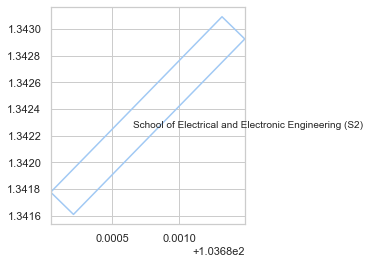

In [11]:
# just the building
name = "School of Electrical and Electronic Engineering (S2)"
name_id = df[df.name == name].index.get_values()[0]
plot_shape(name_id, name)


In [12]:
# printing the complete map
def plot_map(sf, location, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    plt.plot(location[0], location[1], marker='o', markersize=10, color="red")
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

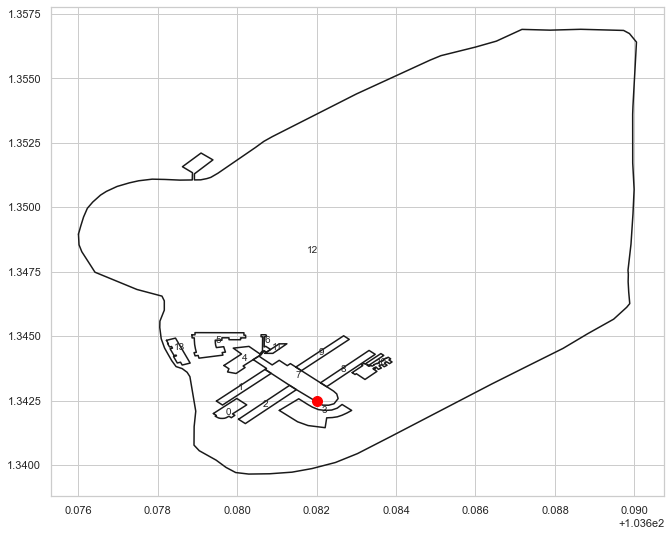

In [14]:
x,y = 103.681, 1.3425 # sample location
plot_map(sf,(x+0.001,y))

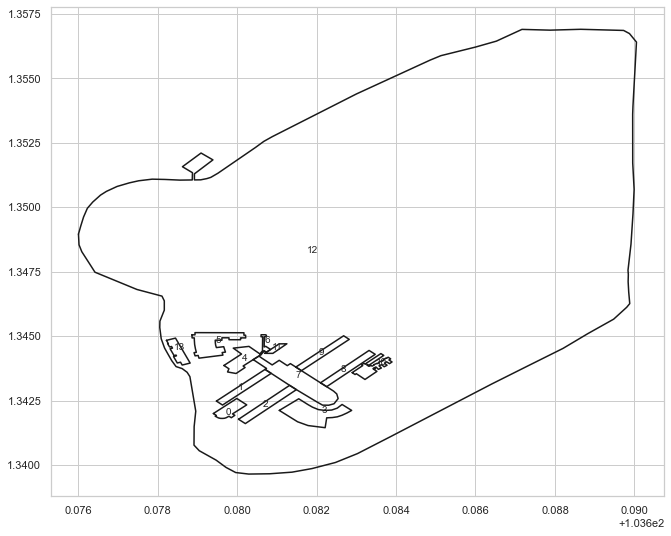

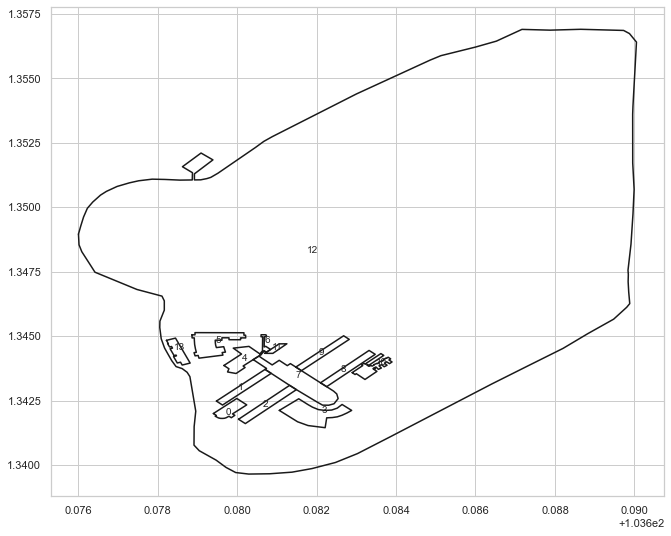

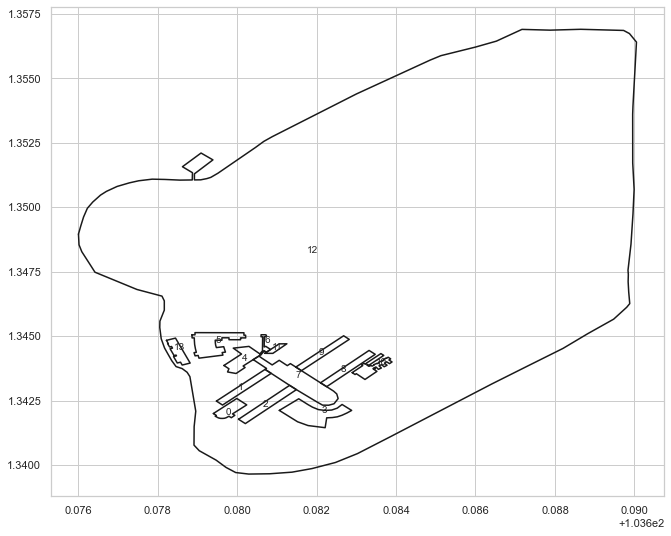

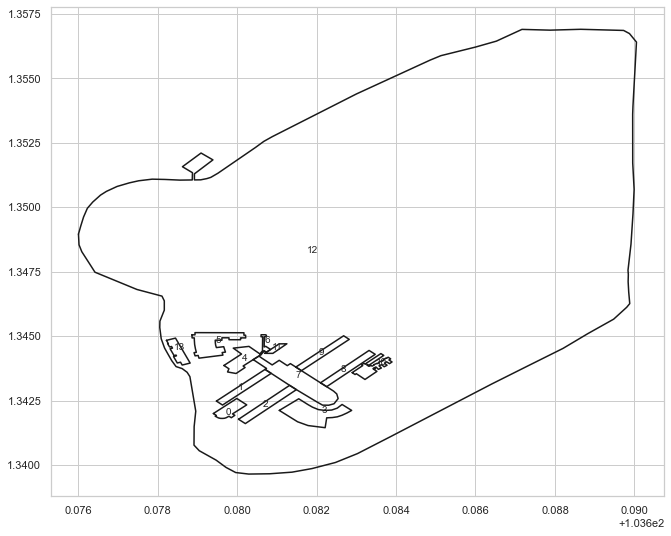

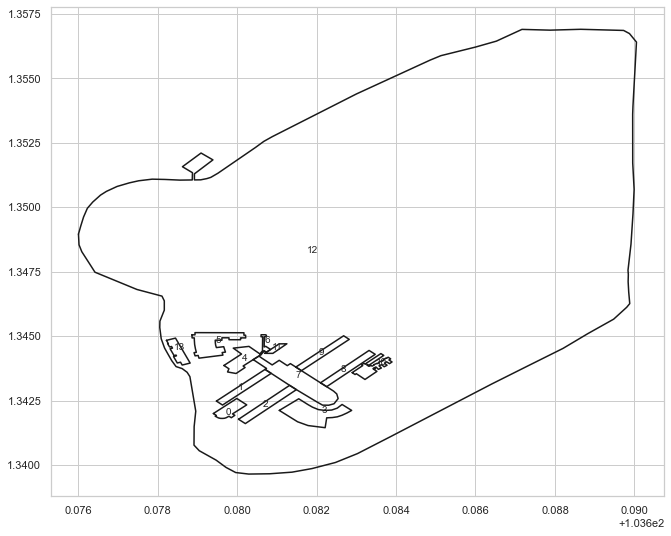

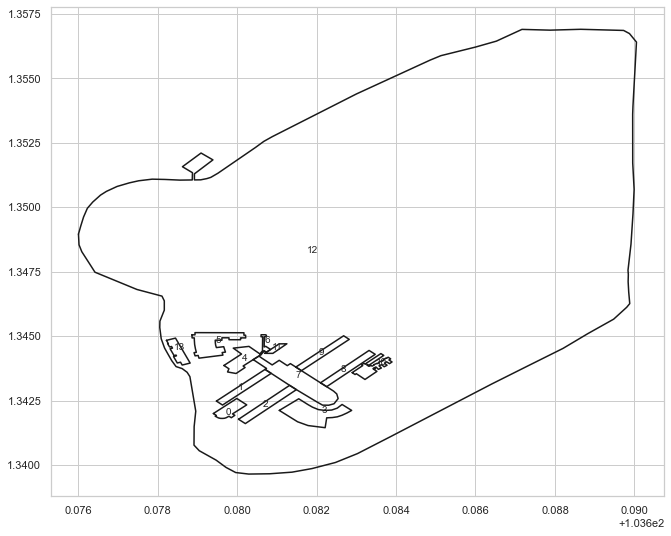

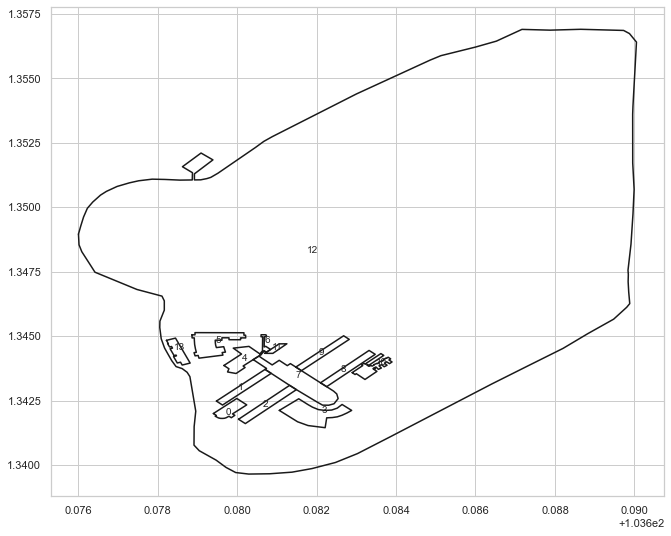

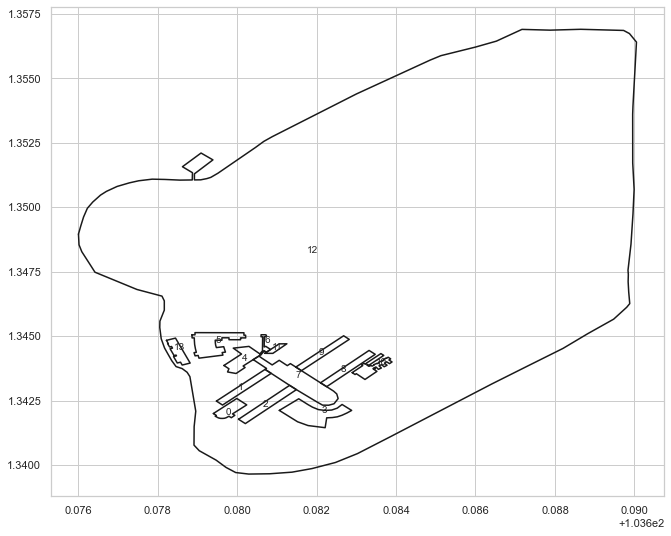

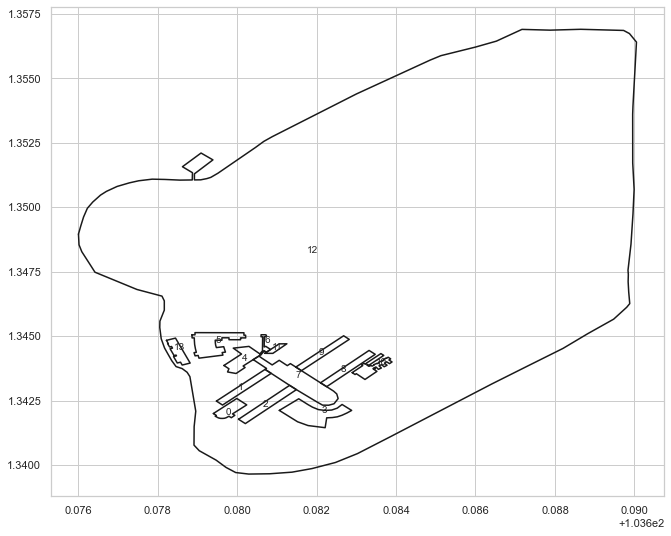

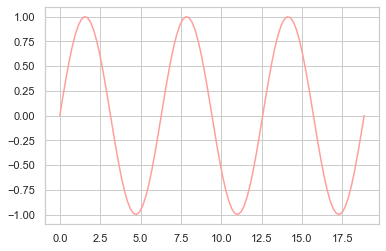

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()